In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras import regularizers
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping

In [2]:
df = pd.read_csv('../dataset/cleaned.csv')

In [3]:
df_dummies = df.filter(['city', 'state', 'event_type', 'flight_condition','flight_operation', 'sightseeing', 'second_pilot'], axis=1)

In [4]:
# One-hot encode 'city', 'state', 'event_type', 'flight_condition','flight_operation', 'sightseeing', 'second_pilot'

df_dummies = pd.get_dummies(df_dummies, columns=['city', 'state', 'event_type', 'flight_condition','flight_operation', 'sightseeing', 'second_pilot'], drop_first=True)

In [5]:
df_dummies.head(1)

,city_AGUA DULCE,city_ALBUQUERQUE,city_ANAHUAC,city_ANDOVER,city_ANGLETON,city_ANOKA,city_ARCADIA,city_ARECIBO,city_ARGYLE,city_ATLANTA,...,flight_operation_PERS,flight_operation_POSI,flight_operation_PUBF,flight_operation_PUBL,flight_operation_PUBS,flight_operation_PUBU,flight_operation_SKYD,flight_operation_UNK,sightseeing_True,second_pilot_True
0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [6]:
# making death and injuries as either 1 or 0

for i in range(len(df['deaths_and_injuries'])):
    if df['deaths_and_injuries'][i] > 0:
        df['deaths_and_injuries'][i] = 1

<ipython-input-6-4febe336a289>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['deaths_and_injuries'][i] = 1


In [7]:
df['deaths_and_injuries']

0        0.0
1        0.0
2        1.0
3        1.0
4        0.0
        ... 
14317    0.0
14318    1.0
14319    1.0
14320    0.0
14321    1.0
Name: deaths_and_injuries, Length: 14322, dtype: float64

In [8]:
X = df_dummies.values
y = df['deaths_and_injuries'].astype(int).values

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [9]:
X_train[0].shape

(5166,)

### Basic Model, 10 layers

In [10]:
# model
model = Sequential()

# layers
model.add(Dense(4096, activation='relu', input_shape=(5166,)))
model.add(Dense(2048, activation='relu'))
model.add(Dense(1024, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile
model.compile(loss='binary_crossentropy', optimizer='adam', metrics='acc')

# Fit it
results = model.fit(X_train, y_train,
                    batch_size=256,
                    epochs=20,
                    validation_data=(X_test, y_test),
                    verbose=0) # no printing

In [12]:
preds_loss_10 = model.predict(X_test)

In [13]:
# Visualize the loss
train_loss_10 = results.history['loss']
test_loss_10 = results.history['val_loss']

train_acc_10 = results.history['acc']
test_acc_10 = results.history['val_acc']

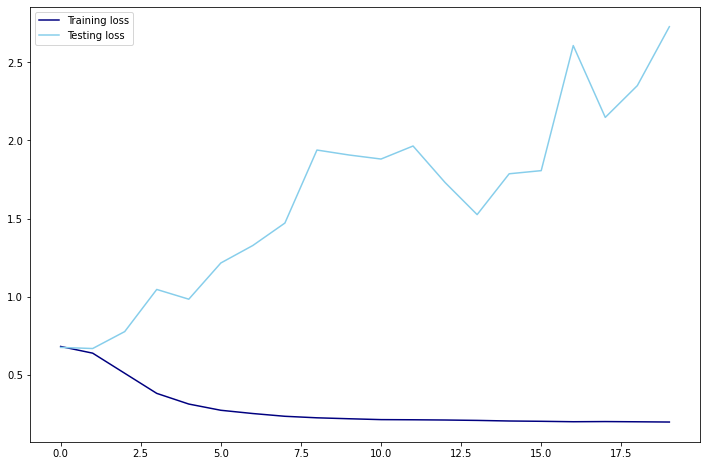

In [14]:
plt.figure(figsize=(12, 8))
plt.plot(train_loss_10, label='Training loss', color='navy')
plt.plot(test_loss_10, label='Testing loss', color='skyblue')
plt.legend();

plt.savefig('../images/nn_10.png', bbox_inches='tight')

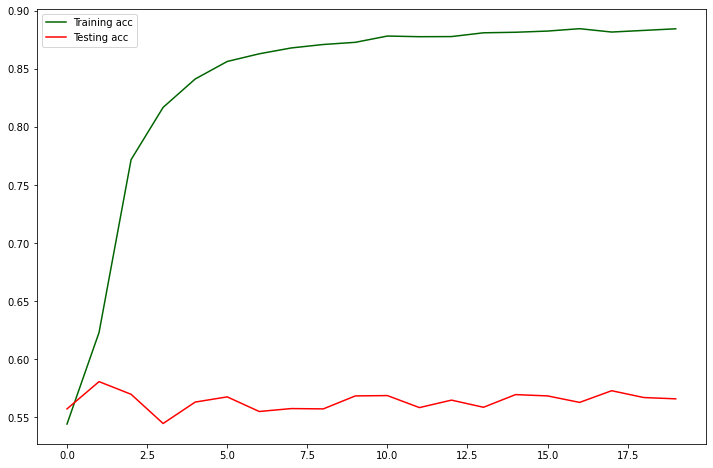

In [15]:
plt.figure(figsize=(12, 8))

plt.plot(train_acc_10, label='Training acc', color='darkgreen')
plt.plot(test_acc_10, label='Testing acc', color='red')

plt.legend();

plt.savefig('../images/nn_10ac.png', bbox_inches='tight')

### Basic Model, 5 layers A

In [16]:
# model
model = Sequential()

# layers
model.add(Dense(4096, activation='relu', input_shape=(5166,)))
model.add(Dense(2048, activation='relu'))
model.add(Dense(1024, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile it
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])

# Fit it
results = model.fit(X_train, y_train,
                    batch_size=256,
                    epochs=20,
                    validation_data=(X_test, y_test),
                    verbose=0) # no printing

In [17]:
preds_loss_a = model.predict(X_test)

In [18]:
# Visualize the loss
train_loss_a = results.history['loss']
test_loss_a = results.history['val_loss']

train_acc_a = results.history['acc']
test_acc_a = results.history['val_acc']

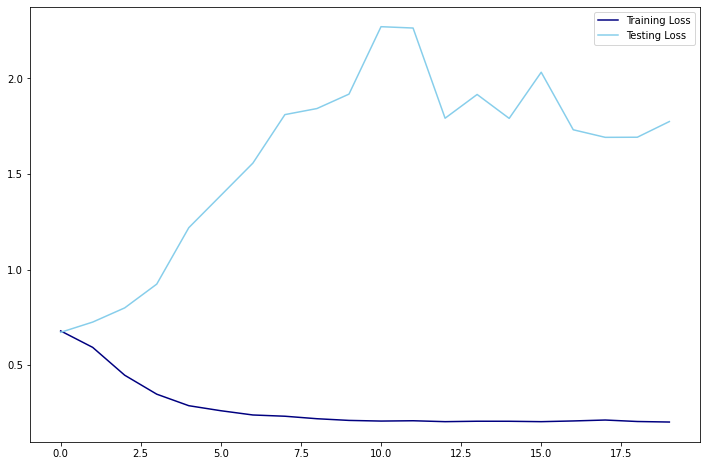

In [23]:
plt.figure(figsize=(12, 8))

plt.plot(train_loss_a, label='Training Loss', color='navy')
plt.plot(test_loss_a, label='Testing Loss', color='skyblue')

plt.legend();

plt.savefig('../images/nn_a.png', bbox_inches='tight')

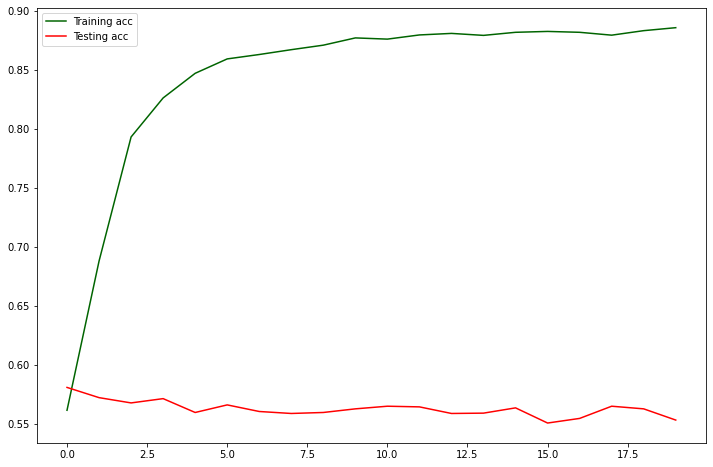

In [20]:
plt.figure(figsize=(12, 8))

plt.plot(train_acc_a, label='Training acc', color='darkgreen')
plt.plot(test_acc_a, label='Testing acc', color='red')

plt.legend();

plt.savefig('../images/nn_a_acc.png', bbox_inches='tight')

### Basic Model, 5 layers B

In [21]:
# model
model = Sequential()

# layers
model.add(Dense(4096, activation='relu', input_shape=(5166,)))
model.add(Dense(1024, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile it
model.compile(loss='binary_crossentropy', optimizer='adam', metrics='acc')

# Fit it
results = model.fit(X_train, y_train,
                    batch_size=512,
                    epochs=20,
                    validation_data=(X_test, y_test),
                    verbose=0) # no printing

In [22]:
preds_loss_b = model.predict(X_test)

In [25]:
# Visualize the loss
train_loss_b = results.history['loss']
test_loss_b = results.history['val_loss']

train_acc_b = results.history['acc']
test_acc_b = results.history['val_acc']

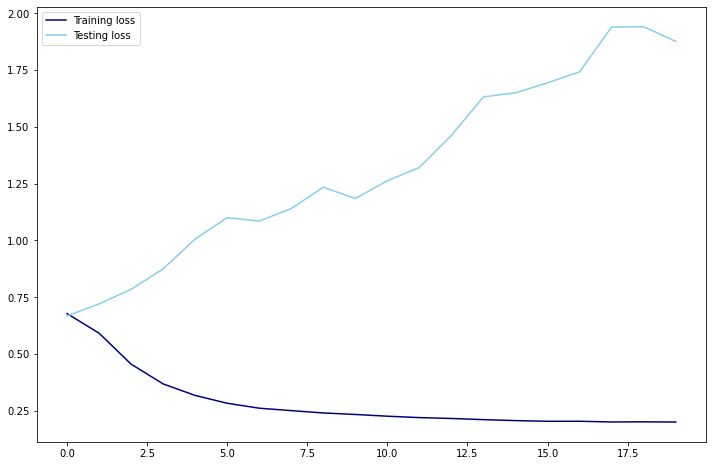

In [26]:
plt.figure(figsize=(12, 8))

plt.plot(train_loss_b, label='Training loss', color='navy')
plt.plot(test_loss_b, label='Testing loss', color='skyblue')

plt.legend();

plt.savefig('../images/nn_b.png', bbox_inches='tight')

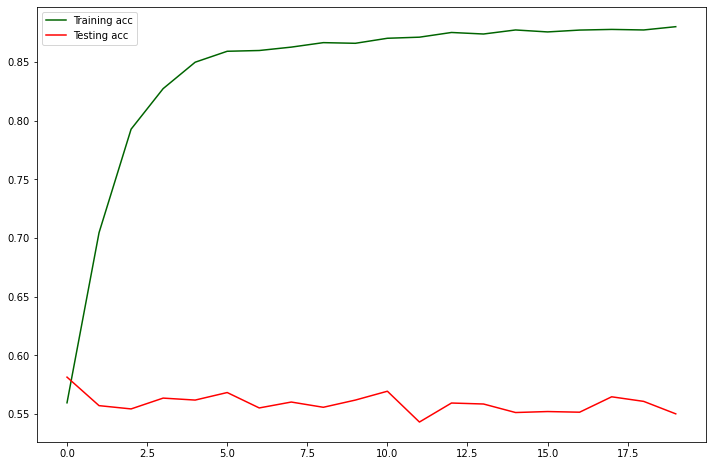

In [27]:
plt.figure(figsize=(12, 8))

plt.plot(train_acc_b, label='Training acc', color='darkgreen')
plt.plot(test_acc_b, label='Testing acc', color='red')

plt.legend();

plt.savefig('../images/nn_b.png', bbox_inches='tight')

===

### Model with L2 Regularizer, 5 layers B

In [28]:
# model
model = Sequential()

# layers
model.add(Dense(4096, activation='relu', input_shape=(5166,), kernel_regularizer=l2(.001)))
model.add(Dense(1024, activation='relu', kernel_regularizer=l2(.001)))
model.add(Dense(256, activation='relu', kernel_regularizer=l2(.001)))
model.add(Dense(64, activation='relu', kernel_regularizer=l2(.001)))
model.add(Dense(16, activation='relu', kernel_regularizer=l2(.001)))
model.add(Dense(1, activation='sigmoid'))

# Compile it
model.compile(loss='binary_crossentropy', optimizer='adam', metrics='acc')

# Fit it
results = model.fit(X_train, y_train,
                    batch_size=256,
                    epochs=30,
                    validation_data=(X_test, y_test),
                    verbose=0) # no printing

In [29]:
preds_l2_b = model.predict(X_test)

In [30]:
# Visualize loss
train_l2_b = results.history['loss']
test_l2_b = results.history['val_loss']

train_l2_acc_b = results.history['acc']
test_l2_acc_b = results.history['val_acc']

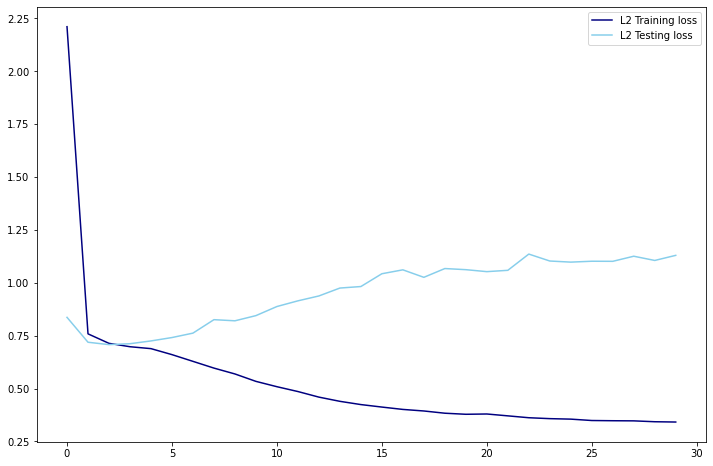

In [31]:
plt.figure(figsize=(12, 8))

plt.plot(train_l2_b, label='L2 Training loss', color='navy')
plt.plot(test_l2_b, label='L2 Testing loss', color='skyblue')

plt.legend();

plt.savefig('../images/nn_rl2b.png', bbox_inches='tight')

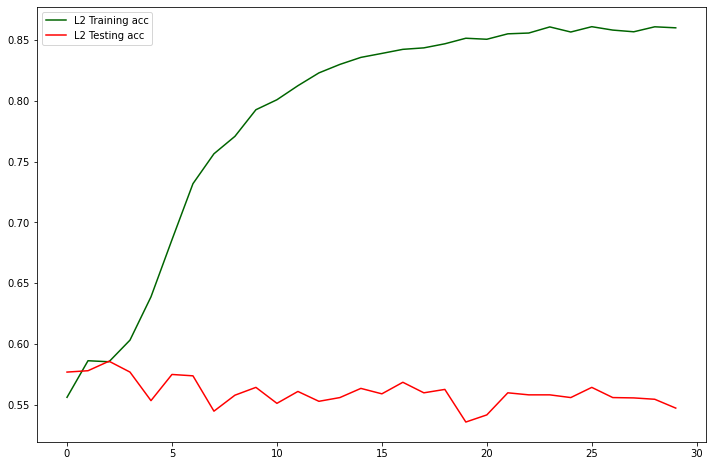

In [32]:
plt.figure(figsize=(12, 8))

plt.plot(train_l2_acc_b , label='L2 Training acc', color='darkgreen')
plt.plot(test_l2_acc_b, label='L2 Testing acc', color='red')

plt.legend();

plt.savefig('../images/nn_rl2b.png', bbox_inches='tight')

### Model with L2 Regularizer, 5 layers A

In [33]:
# model
model = Sequential()

# layers
model.add(Dense(4096, activation='relu', input_shape=(5166,), kernel_regularizer=l2(.001)))
model.add(Dense(2048, activation='relu', kernel_regularizer=l2(.001)))
model.add(Dense(1024, activation='relu', kernel_regularizer=l2(.001)))
model.add(Dense(512, activation='relu', kernel_regularizer=l2(.001)))
model.add(Dense(256, activation='relu', kernel_regularizer=l2(.001)))

# output
model.add(Dense(1, activation='sigmoid'))

# Compile it
model.compile(loss='binary_crossentropy',  optimizer='adam', metrics='acc')

# Fit it
results = model.fit(X_train, y_train,
                    batch_size=256,
                    epochs=20,
                    validation_data=(X_test, y_test),
                    verbose=0) # no printing

In [34]:
preds_l2_a = model.predict(X_test)

In [35]:
# Visualize loss
train_l2_a = results.history['loss']
test_l2_a = results.history['val_loss']

train_l2_acc_a = results.history['acc']
test_l2_acc_a = results.history['val_acc']

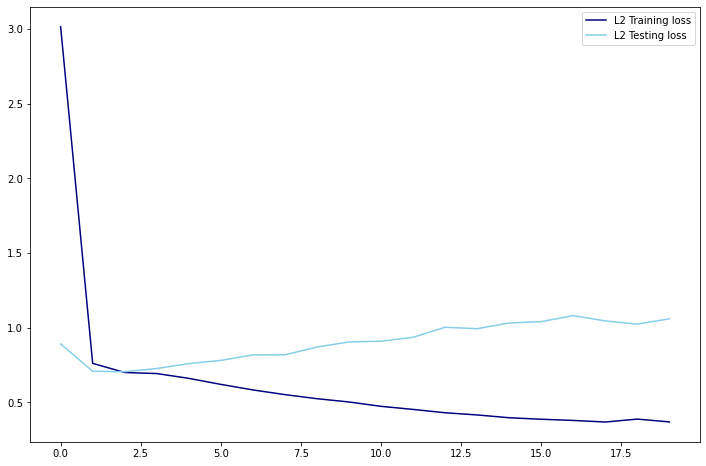

In [38]:
plt.figure(figsize=(12, 8))

plt.plot(train_l2_a, label='L2 Training loss', color='navy')
plt.plot(test_l2_a, label='L2 Testing loss', color='skyblue')

plt.legend();

plt.savefig('../images/nn_rl2a.png', bbox_inches='tight')

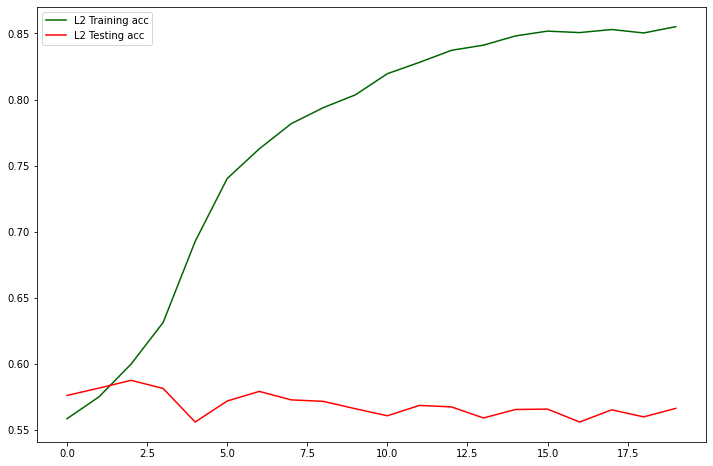

In [37]:
plt.figure(figsize=(12, 8))

plt.plot(train_l2_acc_a, label='L2 Training acc', color='darkgreen')
plt.plot(test_l2_acc_a, label='L2 Testing acc', color='red')

plt.legend();

plt.savefig('../images/nn_rl2acc_a.png', bbox_inches='tight')

===

### Dropout Model, 5 layers B

In [39]:
# model
model = Sequential()

# layers
model.add(Dense(4096, activation='relu', input_shape=(5166,)))
model.add(Dropout(.8))
model.add(Dense(1024, activation='relu'))
model.add(Dropout(.8))
model.add(Dense(256, activation='relu'))
model.add(Dropout(.8))
model.add(Dense(64, activation='relu'))
model.add(Dropout(.8))
model.add(Dense(16, activation='relu'))
model.add(Dropout(.8))

# output
model.add(Dense(1, activation='sigmoid'))

# Compile it
model.compile(loss='binary_crossentropy', optimizer='adam', metrics='acc')

# Fit it
results = model.fit(X_train, y_train,
                    batch_size=256,
                    epochs=20,
                    validation_data=(X_test, y_test),
                    verbose=0) # no printing

In [40]:
preds_dropout_b = model.predict(X_test)

In [41]:
train_dropout_b = results.history['loss']
test_dropout_b = results.history['val_loss']

train_dropout_acc_b = results.history['acc']
test_dropout_acc_b = results.history['val_acc']

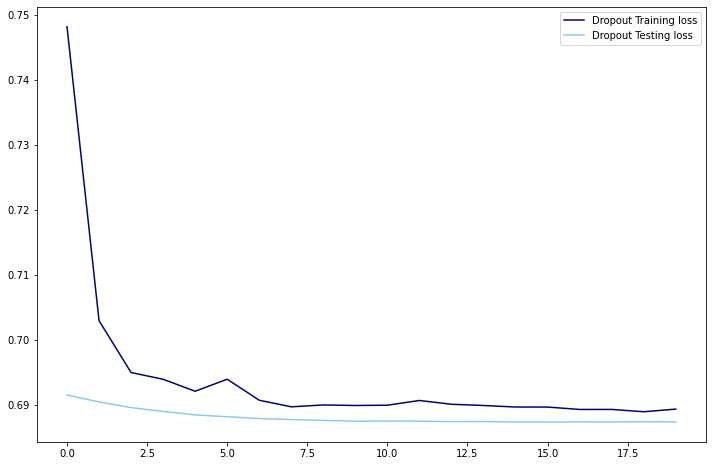

In [42]:
plt.figure(figsize=(12, 8))

plt.plot(train_dropout_b, label='Dropout Training loss', color='navy')
plt.plot(test_dropout_b, label='Dropout Testing loss', color='skyblue')

plt.legend();

plt.savefig('../images/nn_drop_b.png', bbox_inches='tight')

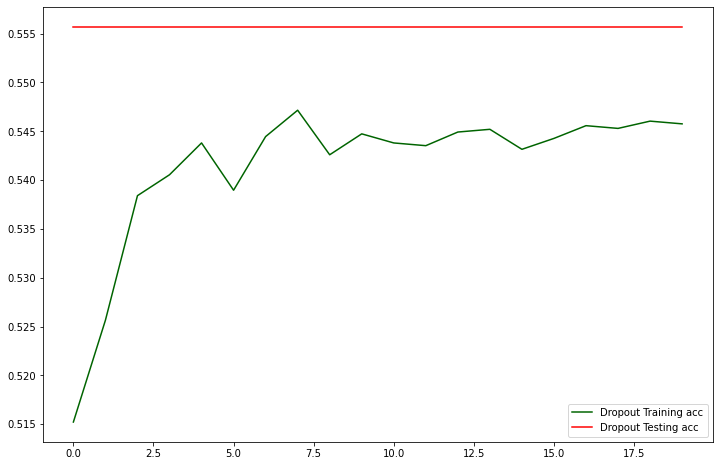

In [43]:
plt.figure(figsize=(12, 8))

plt.plot(train_dropout_acc_b, label='Dropout Training acc', color='darkgreen')
plt.plot(test_dropout_acc_b, label='Dropout Testing acc', color='red')

plt.legend();

plt.savefig('../images/nn_drop_acc_b.png', bbox_inches='tight')

===

### Dropout Model, 5 layers A

In [44]:
# model
model = Sequential()

# layers
model.add(Dense(4096, activation='relu', input_shape=(5166,)))
model.add(Dropout(.8))
model.add(Dense(1024, activation='relu'))
model.add(Dropout(.8))
model.add(Dense(256, activation='relu'))
model.add(Dropout(.8))
model.add(Dense(64, activation='relu'))
model.add(Dropout(.8))
model.add(Dense(16, activation='relu'))
model.add(Dropout(.8))
model.add(Dense(1, activation='sigmoid'))

# Compile it
model.compile(loss='binary_crossentropy', optimizer='adam', metrics='acc')

# Fit it
results = model.fit(X_train, y_train,
                    batch_size=512,
                    epochs=20,
                    validation_data=(X_test, y_test),
                    verbose=0) # no printing

In [45]:
preds_dropout_a = model.predict(X_test)

In [46]:
train_dropout_a = results.history['loss']
test_dropout_a = results.history['val_loss']

train_dropout_acc_a = results.history['acc']
test_dropout_acc_a = results.history['val_acc']

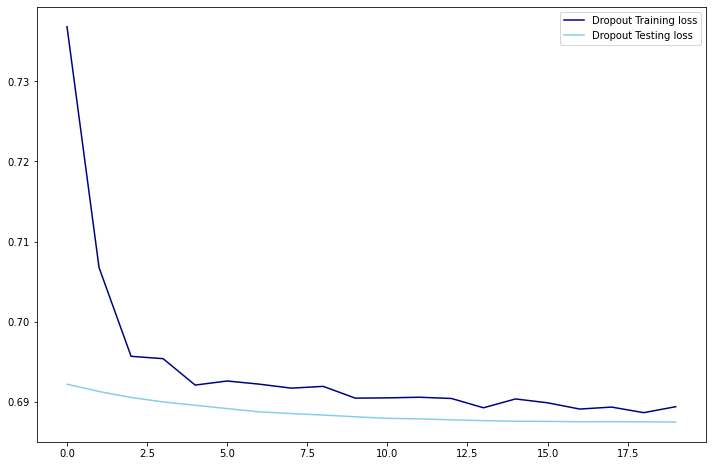

In [47]:
plt.figure(figsize=(12, 8))

plt.plot(train_dropout_a, label='Dropout Training loss', color='navy')
plt.plot(test_dropout_a, label='Dropout Testing loss', color='skyblue')

plt.legend();

plt.savefig('../images/nn_drop_a.png', bbox_inches='tight')

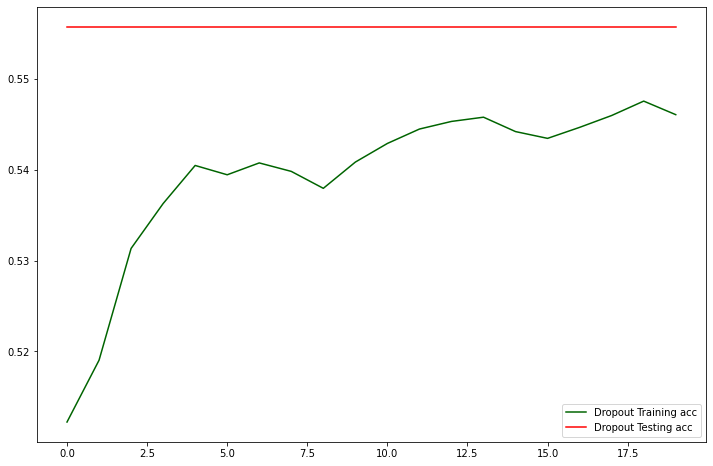

In [48]:
plt.figure(figsize=(12, 8))

plt.plot(train_dropout_acc_a, label='Dropout Training acc', color='darkgreen')
plt.plot(test_dropout_acc_a, label='Dropout Testing acc', color='red')

plt.legend();

plt.savefig('../images/nn_drop_acc_a.png', bbox_inches='tight')

===

### Add early stops

In [49]:
# model
model = Sequential()

# layers
model.add(Dense(4096, activation='relu', input_shape=(5166,)))
model.add(Dropout(.8))
model.add(Dense(1024, activation='relu'))
model.add(Dropout(.8))
model.add(Dense(256, activation='relu'))
model.add(Dropout(.8))
model.add(Dense(64, activation='relu'))
model.add(Dropout(.8))
model.add(Dense(16, activation='relu'))
model.add(Dropout(.8))

# output
model.add(Dense(1, activation='sigmoid'))
early_stop = EarlyStopping(patience=5)

# Compile it
model.compile(loss='binary_crossentropy', optimizer='adam', metrics='acc')

# Fit it
results = model.fit(X_train, y_train,
                    batch_size=512,
                    epochs=20,
                    validation_data=(X_test, y_test),
                    callbacks=[early_stop],
                    verbose=0) # no printing

In [50]:
preds_es = model.predict(X_test)

In [51]:
# Visualize loss
train_es = results.history['loss']
test_es = results.history['val_loss']

train_es_acc = results.history['acc']
test_es_acc = results.history['val_acc']

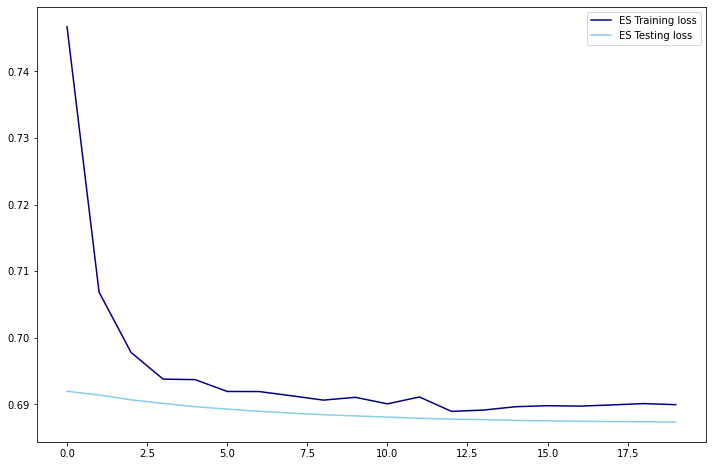

In [52]:
plt.figure(figsize=(12, 8))

plt.plot(train_es, label='ES Training loss', color='navy')
plt.plot(test_es, label='ES Testing loss', color='skyblue')

plt.legend();

plt.savefig('../images/nn_es.png', bbox_inches='tight')

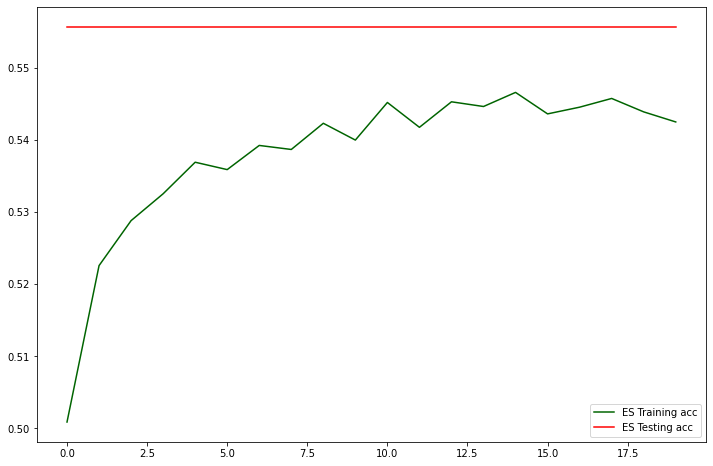

In [53]:
plt.figure(figsize=(12, 8))

plt.plot(train_es_acc, label='ES Training acc', color='darkgreen')
plt.plot(test_es_acc, label='ES Testing acc', color='red')

plt.legend();

plt.savefig('../images/nn_es_acc.png', bbox_inches='tight')

### Add early stops, drop and regularizer

In [54]:
# model
model = Sequential()

# layers
model.add(Dense(4096, activation='relu', input_shape=(5166,), kernel_regularizer=l2(.001)))
model.add(Dropout(.8))
model.add(Dense(1024, activation='relu', kernel_regularizer=l2(.001)))
model.add(Dropout(.8))
model.add(Dense(256, activation='relu', kernel_regularizer=l2(.001)))
model.add(Dropout(.8))
model.add(Dense(64, activation='relu', kernel_regularizer=l2(.001)))
model.add(Dropout(.8))
model.add(Dense(16, activation='relu', kernel_regularizer=l2(.001)))
model.add(Dropout(.8))

# output
model.add(Dense(1, activation='sigmoid'))
early_stop = EarlyStopping(patience=5)

# Compile it
model.compile(loss='binary_crossentropy', optimizer='adam', metrics='acc')

# Fit it
results = model.fit(X_train, y_train,
                    batch_size=512,
                    epochs=50,
                    validation_data=(X_test, y_test),
                    callbacks=[early_stop],
                    verbose=0) # no printing

In [55]:
preds_es_rg = model.predict(X_test)

In [56]:
# Visualize loss
train_es_rg = results.history['loss']
test_es_rg = results.history['val_loss']

train_es_rg_acc = results.history['acc']
test_es_rg_acc = results.history['val_acc']

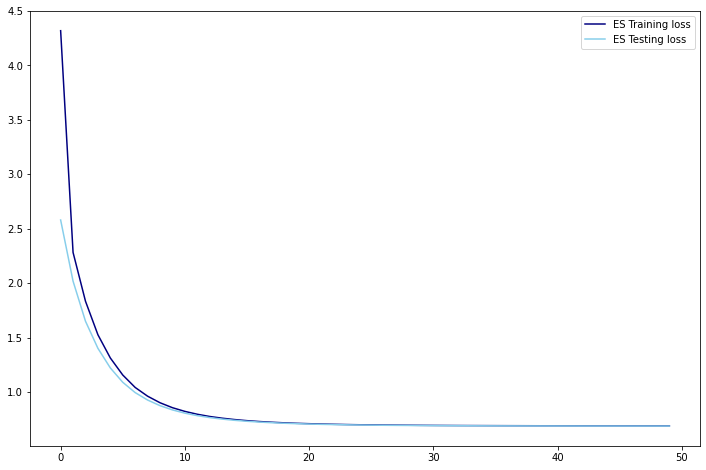

In [57]:
plt.figure(figsize=(12, 8))

plt.plot(train_es_rg, label='ES Training loss', color='navy')
plt.plot(test_es_rg, label='ES Testing loss', color='skyblue')

plt.legend();

plt.savefig('../images/nn_es_rg.png', bbox_inches='tight')

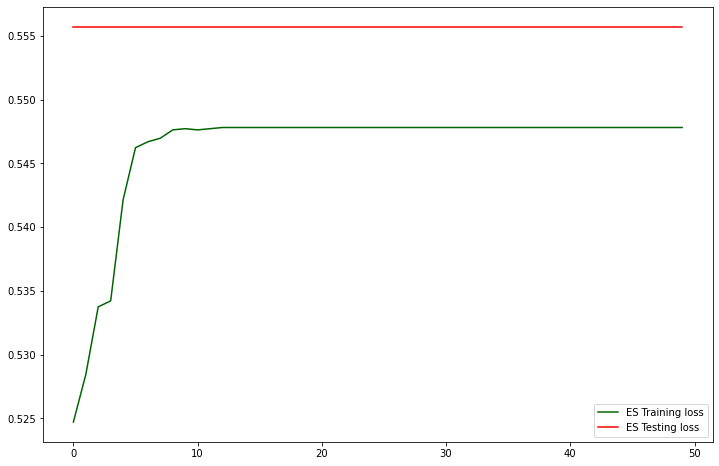

In [58]:
plt.figure(figsize=(12, 8))

plt.plot(train_es_rg_acc, label='ES Training loss', color='darkgreen')
plt.plot(test_es_rg_acc, label='ES Testing loss', color='red')

plt.legend();

plt.savefig('../images/nn_es_rg_acc.png', bbox_inches='tight')